In [10]:
import pandas as pd

pathLyrics = "./song-lyrics/lyrics-data.csv"
pathArtists = "./song-lyrics/artists-data.csv"

dataframeLyrics = pd.read_csv(pathLyrics)
dataframeArtists = pd.read_csv(pathArtists)

#Only English + lowercase
#TODO: Chordsheets filtern
dataLyricsFilterd = dataframeLyrics[dataframeLyrics['Idiom'] == 'ENGLISH']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental.']

dataLyricsFilterd = dataLyricsFilterd.apply(lambda x: x.astype(str).str.lower())
dataArtistsFilterd = dataframeArtists.apply(lambda x: x.astype(str).str.lower())
del dataArtistsFilterd['Genres']
del dataArtistsFilterd['Popularity']
del dataArtistsFilterd['Songs']

dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'samba']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'sertanejo']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'funk carioca']

dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Artist'] == '10000 maniacs']
#Hier ungewünschte Begriffe einfügen
patternDel = ["---", "instrumental","==="]
for patt in patternDel:
    filter = dataLyricsFilterd['Lyric'].str.contains(patt)
    dataLyricsFilterd = dataLyricsFilterd[~filter]

    
    
    
    
#dataArtistsFilterd
#dataLyricsFilterd.to_csv('filterdData.csv')

dataArtistsFilterd

,Artist,Link,Genre
0,10000 maniacs,/10000-maniacs/,rock
1947,10000 maniacs,/10000-maniacs/,pop


In [11]:
mergedData = pd.merge(dataLyricsFilterd, dataArtistsFilterd, how='inner', left_on='ALink',right_on='Link')
del mergedData['ALink']
del mergedData['SName']
del mergedData['SLink']
del mergedData['Idiom']
del mergedData['Artist']
del mergedData['Link']
mergedData
#mergedData.to_csv('mergedData.csv')

,Lyric,Genre
0,i could feel at the time. there was no way of ...,rock
1,i could feel at the time. there was no way of ...,pop
2,"take me now, baby, here as i am. hold me close...",rock
3,"take me now, baby, here as i am. hold me close...",pop
4,these are. these are days you'll remember. nev...,rock
...,...,...
257,i will twine with your mingles of raven black ...,pop
258,[ music: robert buck/words: natalie merchant ]...,rock
259,[ music: robert buck/words: natalie merchant ]...,pop
260,i'd like to know what makes you stay. while yo...,rock


<AxesSubplot:>

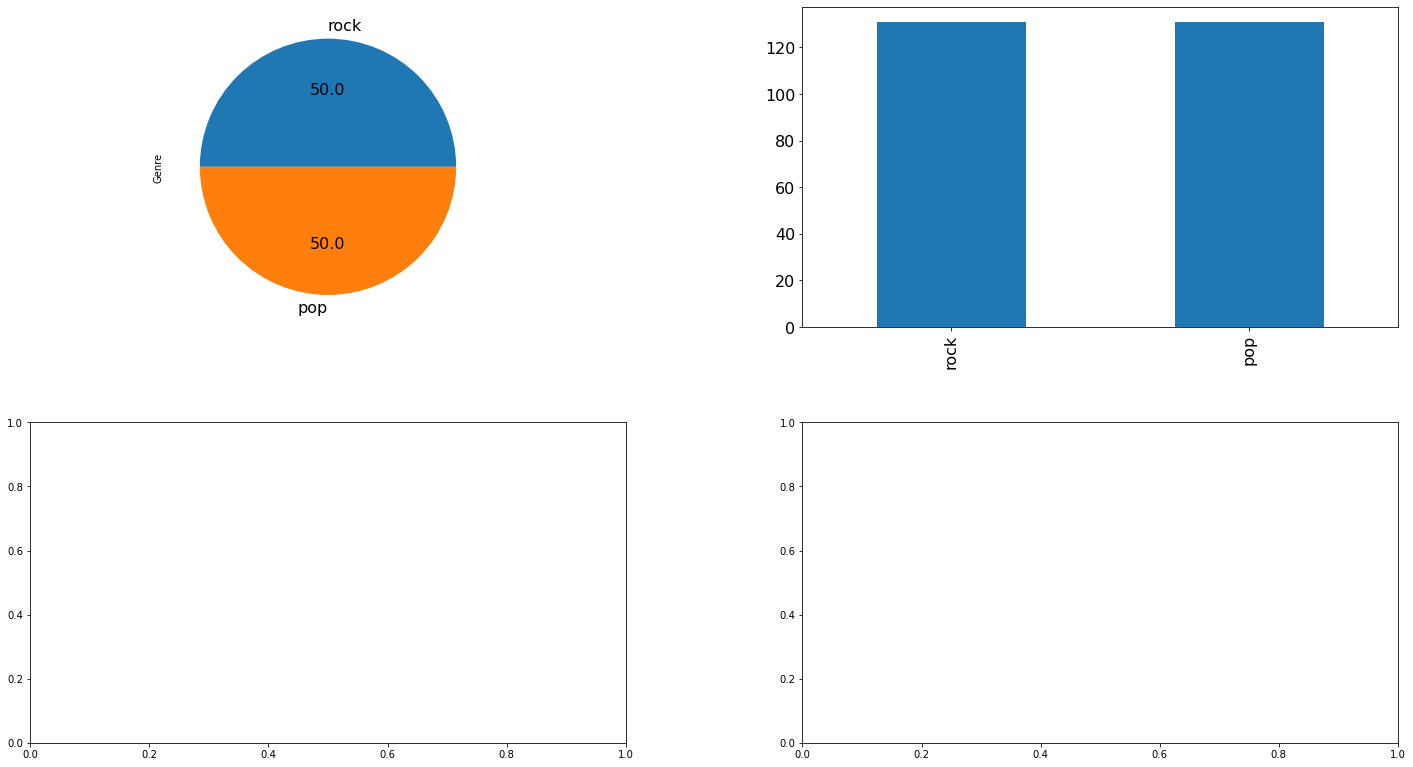

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


genreCount = mergedData['Genre'].value_counts()

fig, axarr = plt.subplots(2, 2)
fig.tight_layout()


genreCount.plot.pie( figsize=(12, 12), fontsize=16, ax=axarr[0][0] , autopct='%.1f' )
genreCount.plot.bar( figsize=(22, 12), fontsize=16, ax=axarr[0][1] )



In [13]:
from collections import Counter 
word_index = Counter(" ".join(mergedData["Lyric"]).split()).most_common(100)

word_index######

[('the', 2414),
 ('a', 1300),
 ('and', 1176),
 ('to', 1094),
 ('i', 964),
 ('in', 886),
 ('you', 814),
 ('of', 766),
 ('for', 488),
 ('that', 476),
 ('your', 428),
 ('is', 424),
 ('my', 420),
 ('on', 358),
 ('with', 350),
 ('it', 318),
 ('was', 302),
 ('me', 296),
 ('as', 276),
 ('but', 252),
 ('so', 232),
 ('be', 228),
 ('they', 222),
 ('we', 218),
 ('from', 216),
 ('all', 214),
 ("don't", 208),
 ('when', 182),
 ('he', 182),
 ('if', 176),
 ('no', 172),
 ('by', 168),
 ('like', 162),
 ('will', 158),
 ('their', 156),
 ('this', 156),
 ('her', 156),
 ('can', 154),
 ('how', 154),
 ('know', 148),
 ("i'm", 142),
 ('never', 140),
 ('where', 138),
 ('not', 138),
 ('there', 132),
 ("it's", 132),
 ('his', 132),
 ('love', 130),
 ('some', 128),
 ('she', 128),
 ('take', 126),
 ('are', 126),
 ('just', 126),
 ('what', 122),
 ('could', 116),
 ('at', 116),
 ('time', 114),
 ('were', 114),
 ("there's", 110),
 ('one', 110),
 ('have', 110),
 ('see', 110),
 ('now', 106),
 ('or', 104),
 ("you'll", 100),
 ('yo

In [7]:
#most_commonn = set([t[0] for t in word_index])
#occurrences = []
#for lyric in mergedData['Lyric']:
    #internalCounter = Counter(" ".join(mergedData["Lyric"]).split()).lyric(10000)
    #internal_counter = Counter(lyric.split())
    
    #print(internal_counter)
    #print(dict(zip(internal_counter[::2], internal_counter[1::2])))
    #print(lyric)
    
    #print(most_commonn)
    #clean_text = dict(collections.Counter([tok.lower() for tok in tokenized_text if tok not in punctuation and tok not in stopwords]))
    #occurrences.append({internal_counter[c] for c in most_commonn})
    #for c in most_commonn:
    #    occurrences.append(internal_counter[c])
    
    #print(occurrences)   
#newThingy = pd.DataFrame(occurrences)
#newThingy.to_csv('test.csv')
    #newThingy

In [37]:
most_common = set([t[0] for t in word_index])
xdata = []
xdata_boolean = []
ydata = []
ydata_integer = []
for lyric in mergedData['Lyric']:
    lyric_words = lyric.split()
    cleared_lyrics = ''
    cleared_lyrics_boolean = []
    for word in lyric_words:
        if word in most_common:
            cleared_lyrics += word + ' '
    for words in most_common:
        if words in cleared_lyrics:
            cleared_lyrics_boolean.append(1)
        else:
            cleared_lyrics_boolean.append(0)
    xdata.append(cleared_lyrics)
    xdata_boolean.append(cleared_lyrics_boolean)
      
    #print("Lyric Normal:")
    #print(lyric)
    #print("Lyric Cleared:")
    #print(cleared_lyrics)
    
for genre in mergedData['Genre']:
    if genre == "rock": 
        ydata_integer.append(0);
    
    elif genre == "pop": 
        ydata_integer.append(1);
     
    elif genre == "hip-hop": 
        ydata_integer.append(2);
     

    ydata.append(genre)
    

    
ydata_integer
            


[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [73]:
import numpy as np
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(xdata_boolean,ydata_integer, test_size=0.2)

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

print(train_labels)

#print(X_train)
#print(train_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
Train on 167 samples, validate on 42 samples
Epoch 1/50
167/167 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4790 - val_loss: 0.6927 - val_accuracy: 0.6429
Epoch 2/50
167/167 [==============================] - 0s 305us/step - loss: 0.6932 - accuracy: 0.4790 - val_loss: 0.6933 - val_accuracy: 0.3571
Epoch 3/50
167/167 [=====================

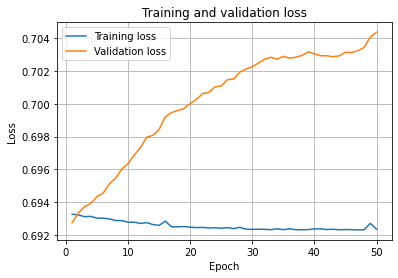

In [78]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()